<a href="https://colab.research.google.com/github/ronincodex/verbose-octo-fiesta/blob/master/Live_Twitter_Data_Sentiment_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description:This program take the sentiment of Bitcoin from Twitter users

In [ ]:
#Importing librarires
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Uplaod the login files
from google.colab import files
files.upload()

Saving NewLogin.csv to NewLogin.csv


{'NewLogin.csv': b'"key"\n"GN514XEaObUTQUoBKZm5Tagu9"\n"eU3AW2BaumxYRAnKRQk6P5wqhjI0llQXyLLkbpSSo5EuoB0zpz"\n"1141913556071268353-1lpF6wXmJ8YKZTKTeQ12ag0gSf9K1Z"\n"2dLukpJSrmr01RRgCITMb1oYhKtgrceX7ladtae1fGeus"\n'}

In [ ]:
#Store the data
log = pd.read_csv('NewLogin.csv')

In [ ]:
#Get the Twitter API credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [ ]:
#Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#Gather 5000 tweets about Bitcoin
search_term = '#bitcoin -filter:retweets'
#create cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2019-02-01', tweet_mode= 'extended').items(5000)
#Store the tweets in a variable and get full text
all_tweets = [tweet.full_text for tweet in tweets]

In [ ]:
# Create a dataframe to store the tweets with a column called 'Tweets'
pd.options.display.max_colwidth = -1
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Show the 1st  20 rows of Twitter data
df.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Tweets
0,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones: Auction giant Christie’s hopes to set several milestones in crypto art history with its… https://t.co/QTXSoDK9OG | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/3FJTN8YrcV
1,Did you know that the contract is being audited by @Techrate1 ?\n🎇Don't miss the #presale on #DxSale: August 11 @ 3PM EST / 7PM UTC\n▶️https://t.co/DljpOuTPgP◀️\n💬TG: https://t.co/JnJVYahNUd\n\n#BNB #BSC #BSCGem #Crypto #Bitcoin #Binance #BTC #BinanceSmartChain #altcoin #HODL #DOGE https://t.co/wzk71WEpjG
2,How it started vs how it's going\n$btc $eth #ethereum #bitcoin https://t.co/3ThP93sxhI
3,@urcryptogems Definitely check out @AURofficial_ offering 9% reward in any bsc token\n\n#BSCGem #Crypto #cryptocurrency #CryptoNews #BSC #BNB #bitcoin #BTC #blockchain #ETH #ethereum #currency #Trading #exchange #altcoin #binance #market #ATH
4,What bear market? Investors throw record cash behind blockchain firms in 2021: VC investments into crypto over the first six months of 2021 have already more than… https://t.co/xlXinqvS1c | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/7Ff6ayZsJd
5,"Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https://t.co/2b93hjFLPf #SurveyJ #cashapp #bitcoin"
6,"@_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.\n@dipaaa\n@DipaIkbar\n@neha\n#cryptocurrency #Crypto #Bitcoin #Ethereum #ETH #Airdrop #bounty #BSC #BNB #GodDoge"
7,@cryptotradertax takes away the pain of preparing your #bitcoin and #cryptotaxes. You can connect your exchanges and import your historical transactions. \n\nhttps://t.co/rjts84e1wj
8,"Judging by @Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting #Bitcoin for purchases any day now…"
9,"Hey Johnny, definitely keep a look at @AURofficial_ as this bsc project has a unique tokenomics such as rewarding holders in any bsc token.\n\n#BSCGem #Crypto #cryptocurrency #CryptoNews #BSC #BNB #bitcoin #BTC #blockchain #ETH #ethereum #currency #Trading #exchange #altcoin https://t.co/lmYhpbsG2e"


In [ ]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #Removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) #Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #Remove any strings with a '#'
  twt = re.sub('\\n', '', twt) #Removes the '\n' string
  twt = re.sub('https?:\/\/S+', '', twt) #Removes any hyperlinks
  twt = re.sub(':', '', twt) #Removes ':' from string
  twt = re.sub('@', '', twt) #Removes '@' from string
  return twt

In [ ]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set
df.head(50)

,Tweets,Cleaned_Tweets
0,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones: Auction giant Christie’s hopes to set several milestones in crypto art history with its… https://t.co/QTXSoDK9OG | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/3FJTN8YrcV,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones Auction giant Christie’s hopes to set several milestones in crypto art history with its… https//t.co/QTXSoDK9OG | https//t.co/8I40uVqCwg | https//t.co/8I40uVqCwg Bitcoin https//t.co/3FJTN8YrcV
1,Did you know that the contract is being audited by @Techrate1 ?\n🎇Don't miss the #presale on #DxSale: August 11 @ 3PM EST / 7PM UTC\n▶️https://t.co/DljpOuTPgP◀️\n💬TG: https://t.co/JnJVYahNUd\n\n#BNB #BSC #BSCGem #Crypto #Bitcoin #Binance #BTC #BinanceSmartChain #altcoin #HODL #DOGE https://t.co/wzk71WEpjG,Did you know that the contract is being audited by Techrate1 ?🎇Don't miss the on August 11 3PM EST / 7PM UTC▶️https//t.co/DljpOuTPgP◀️💬TG https//t.co/JnJVYahNUd Bitcoin https//t.co/wzk71WEpjG
2,How it started vs how it's going\n$btc $eth #ethereum #bitcoin https://t.co/3ThP93sxhI,How it started vs how it's going$btc $eth bitcoin https//t.co/3ThP93sxhI
3,@urcryptogems Definitely check out @AURofficial_ offering 9% reward in any bsc token\n\n#BSCGem #Crypto #cryptocurrency #CryptoNews #BSC #BNB #bitcoin #BTC #blockchain #ETH #ethereum #currency #Trading #exchange #altcoin #binance #market #ATH,urcryptogems Definitely check out AURofficial_ offering 9% reward in any bsc token bitcoin
4,What bear market? Investors throw record cash behind blockchain firms in 2021: VC investments into crypto over the first six months of 2021 have already more than… https://t.co/xlXinqvS1c | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/7Ff6ayZsJd,What bear market? Investors throw record cash behind blockchain firms in 2021 VC investments into crypto over the first six months of 2021 have already more than… https//t.co/xlXinqvS1c | https//t.co/8I40uVqCwg | https//t.co/8I40uVqCwg Bitcoin https//t.co/7Ff6ayZsJd
5,"Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https://t.co/2b93hjFLPf #SurveyJ #cashapp #bitcoin","Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https//t.co/2b93hjFLPf bitcoin"
6,"@_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.\n@dipaaa\n@DipaIkbar\n@neha\n#cryptocurrency #Crypto #Bitcoin #Ethereum #ETH #Airdrop #bounty #BSC #BNB #GodDoge","_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.dipaaaDipaIkbarneha Bitcoin"
7,@cryptotradertax takes away the pain of preparing your #bitcoin and #cryptotaxes. You can connect your exchanges and import your historical transactions. \n\nhttps://t.co/rjts84e1wj,cryptotradertax takes away the pain of preparing your bitcoin and . You can connect your exchanges and import your historical transactions. https//t.co/rjts84e1wj
8,"Judging by @Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting #Bitcoin for purchases any day now…","Judging by Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting Bitcoin for purchases any day now…"
9,"Hey Johnny, definitely keep a look at @AURofficial_ as this bsc project has a unique tokenomics such as rewarding holders in any bsc token.\n\n#BSCGem #Crypto #cryptocurrency #CryptoNews #BSC #BNB #bitcoin #BTC #blockchain #ETH #ethereum #currency #Trading #exchange #altcoin https://t.co/lmYhpbsG2e","H

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head(20)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones: Auction giant Christie’s hopes to set several milestones in crypto art history with its… https://t.co/QTXSoDK9OG | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/3FJTN8YrcV,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones Auction giant Christie’s hopes to set several milestones in crypto art history with its… https//t.co/QTXSoDK9OG | https//t.co/8I40uVqCwg | https//t.co/8I40uVqCwg Bitcoin https//t.co/3FJTN8YrcV,0.350000,-0.025000
1,Did you know that the contract is being audited by @Techrate1 ?\n🎇Don't miss the #presale on #DxSale: August 11 @ 3PM EST / 7PM UTC\n▶️https://t.co/DljpOuTPgP◀️\n💬TG: https://t.co/JnJVYahNUd\n\n#BNB #BSC #BSCGem #Crypto #Bitcoin #Binance #BTC #BinanceSmartChain #altcoin #HODL #DOGE https://t.co/wzk71WEpjG,Did you know that the contract is being audited by Techrate1 ?🎇Don't miss the on August 11 3PM EST / 7PM UTC▶️https//t.co/DljpOuTPgP◀️💬TG https//t.co/JnJVYahNUd Bitcoin https//t.co/wzk71WEpjG,0.000000,0.000000
2,How it started vs how it's going\n$btc $eth #ethereum #bitcoin https://t.co/3ThP93sxhI,How it started vs how it's going$btc $eth bitcoin https//t.co/3ThP93sxhI,0.000000,0.000000
3,@urcryptogems Definitely check out @AURofficial_ offering 9% reward in any bsc token\n\n#BSCGem #Crypto #cryptocurrency #CryptoNews #BSC #BNB #bitcoin #BTC #blockchain #ETH #ethereum #currency #Trading #exchange #altcoin #binance #market #ATH,urcryptogems Definitely check out AURofficial_ offering 9% reward in any bsc token bitcoin,0.500000,0.000000
4,What bear market? Investors throw record cash behind blockchain firms in 2021: VC investments into crypto over the first six months of 2021 have already more than… https://t.co/xlXinqvS1c | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/7Ff6ayZsJd,What bear market? Investors throw record cash behind blockchain firms in 2021 VC investments into crypto over the first six months of 2021 have already more than… https//t.co/xlXinqvS1c | https//t.co/8I40uVqCwg | https//t.co/8I40uVqCwg Bitcoin https//t.co/7Ff6ayZsJd,0.511111,0.116667
5,"Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https://t.co/2b93hjFLPf #SurveyJ #cashapp #bitcoin","Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https//t.co/2b93hjFLPf bitcoin",0.366667,0.016667
6,"@_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.\n@dipaaa\n@DipaIkbar\n@neha\n#cryptocurrency #Crypto #Bitcoin #Ethereum #ETH #Airdrop #bounty #BSC #BNB #GodDoge","_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.dipaaaDipaIkbarneha Bitcoin",0.688571,0.487857
7,@cryptotradertax takes away the pain of preparing your #bitcoin and #cryptotaxes. You can connect your exchanges and import your historical transactions. \n\nhttps://t.co/rjts84e1wj,cryptotradertax takes away the pain of preparing your bitcoin and . You can connect your exchanges and import your historical transactions. https//t.co/rjts84e1wj,0.000000,0.000000
8,"Judging by @Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting #Bitcoin for purchases any day now…","Judging by Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting Bitcoin for purchases any day now…",0.000000,0.000000
9,"Hey Johnny, definitely keep a look at @AURofficial_ as this bsc project has a unique tokenomics such as rewarding hold

In [ ]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'   

In [ ]:
#Create a column to store the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head(20)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones: Auction giant Christie’s hopes to set several milestones in crypto art history with its… https://t.co/QTXSoDK9OG | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/3FJTN8YrcV,Christie’s ‘No Time Like Present’ Auction Expected to Mark NFT Milestones Auction giant Christie’s hopes to set several milestones in crypto art history with its… https//t.co/QTXSoDK9OG | https//t.co/8I40uVqCwg | https//t.co/8I40uVqCwg Bitcoin https//t.co/3FJTN8YrcV,0.350000,-0.025000,Negative
1,Did you know that the contract is being audited by @Techrate1 ?\n🎇Don't miss the #presale on #DxSale: August 11 @ 3PM EST / 7PM UTC\n▶️https://t.co/DljpOuTPgP◀️\n💬TG: https://t.co/JnJVYahNUd\n\n#BNB #BSC #BSCGem #Crypto #Bitcoin #Binance #BTC #BinanceSmartChain #altcoin #HODL #DOGE https://t.co/wzk71WEpjG,Did you know that the contract is being audited by Techrate1 ?🎇Don't miss the on August 11 3PM EST / 7PM UTC▶️https//t.co/DljpOuTPgP◀️💬TG https//t.co/JnJVYahNUd Bitcoin https//t.co/wzk71WEpjG,0.000000,0.000000,Neutral
2,How it started vs how it's going\n$btc $eth #ethereum #bitcoin https://t.co/3ThP93sxhI,How it started vs how it's going$btc $eth bitcoin https//t.co/3ThP93sxhI,0.000000,0.000000,Neutral
3,@urcryptogems Definitely check out @AURofficial_ offering 9% reward in any bsc token\n\n#BSCGem #Crypto #cryptocurrency #CryptoNews #BSC #BNB #bitcoin #BTC #blockchain #ETH #ethereum #currency #Trading #exchange #altcoin #binance #market #ATH,urcryptogems Definitely check out AURofficial_ offering 9% reward in any bsc token bitcoin,0.500000,0.000000,Neutral
4,What bear market? Investors throw record cash behind blockchain firms in 2021: VC investments into crypto over the first six months of 2021 have already more than… https://t.co/xlXinqvS1c | https://t.co/8I40uVqCwg | https://t.co/8I40uVqCwg #cryptocurrency #Bitcoin #Forex https://t.co/7Ff6ayZsJd,What bear market? Investors throw record cash behind blockchain firms in 2021 VC investments into crypto over the first six months of 2021 have already more than… https//t.co/xlXinqvS1c | https//t.co/8I40uVqCwg | https//t.co/8I40uVqCwg Bitcoin https//t.co/7Ff6ayZsJd,0.511111,0.116667,Positive
5,"Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https://t.co/2b93hjFLPf #SurveyJ #cashapp #bitcoin","Hey I joined a network called SurveyJ and earned $1,415 today! You get paid for surveys and posting on social media. Sign up with my link for an instant $40 signup bonus! https//t.co/2b93hjFLPf bitcoin",0.366667,0.016667,Positive
6,"@_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.\n@dipaaa\n@DipaIkbar\n@neha\n#cryptocurrency #Crypto #Bitcoin #Ethereum #ETH #Airdrop #bounty #BSC #BNB #GodDoge","_DOGE_GALAXY This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.dipaaaDipaIkbarneha Bitcoin",0.688571,0.487857,Positive
7,@cryptotradertax takes away the pain of preparing your #bitcoin and #cryptotaxes. You can connect your exchanges and import your historical transactions. \n\nhttps://t.co/rjts84e1wj,cryptotradertax takes away the pain of preparing your bitcoin and . You can connect your exchanges and import your historical transactions. https//t.co/rjts84e1wj,0.000000,0.000000,Neutral
8,"Judging by @Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting #Bitcoin for purchases any day now…","Judging by Tesla ’s history of suspiciously timed bitcoin news, It stands to reason they will resume accepting Bitcoin for purchases any day now…",0.000000,0.000000,Neutral
9,"Hey Johnny, definitely keep a lo

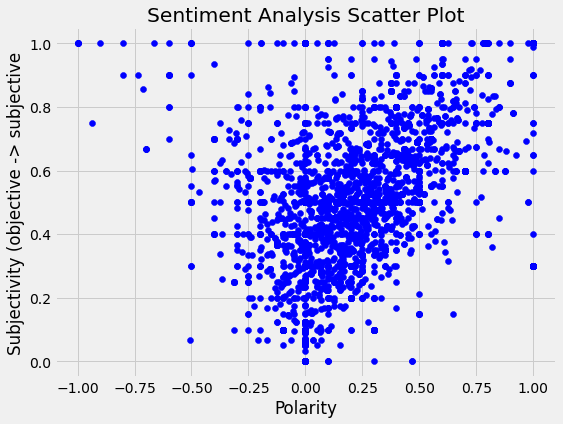

In [ ]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective')
plt.show()

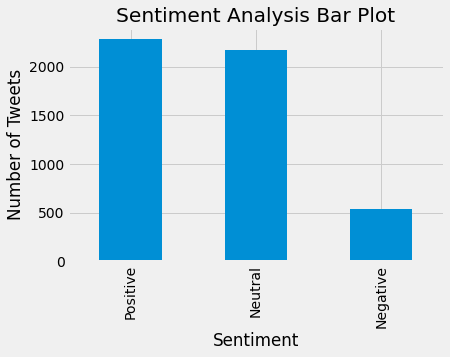

In [ ]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
#Create an object for Word Cloud
df_Negative= df.loc[df['Sentiment']== "Negative"]
df_Positive= df.loc[df['Sentiment']== "Positive"]
df_Neutral= df.loc[df['Sentiment']== "Neutral"]

In [ ]:
#Crea
allWords_Negative = ' '.join( [twts for twts in df_Negative['Cleaned_Tweets']] )
allWords_Positive = ' '.join( [twts for twts in df_Positive['Cleaned_Tweets']] )
allWords_Neutral = ' '.join( [twts for twts in df_Neutral['Cleaned_Tweets']] )


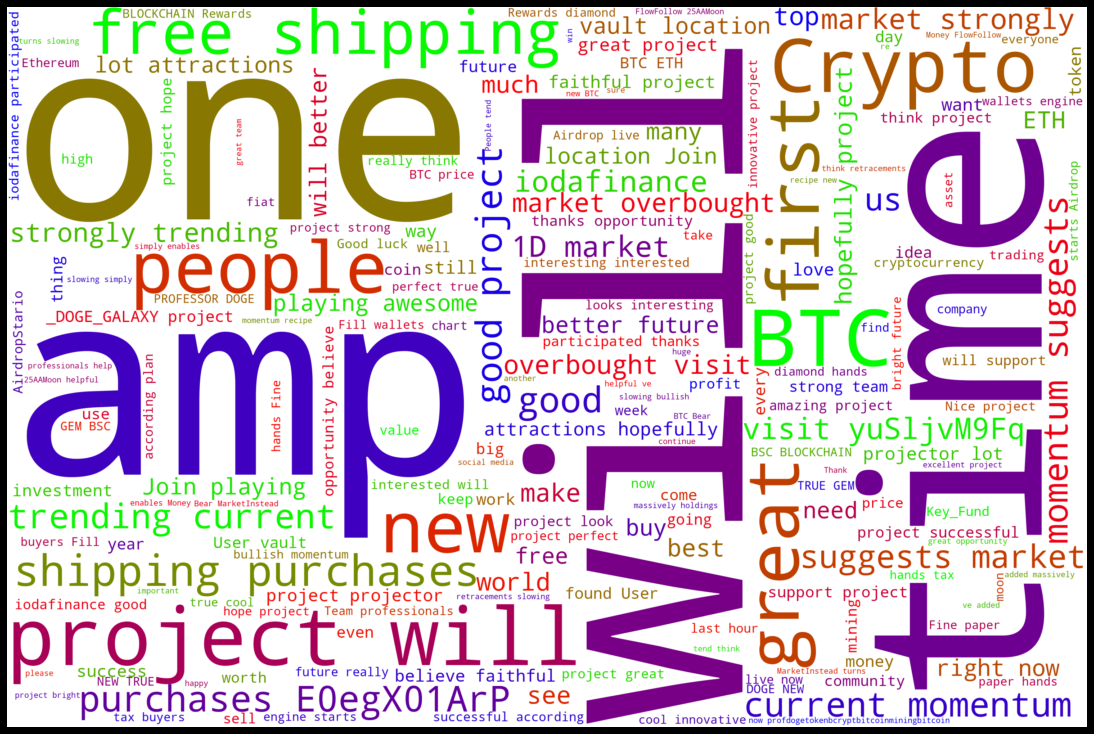

In [ ]:
#Wordcloud for Positive Tweets
stopwords = set(STOPWORDS)
stop_words = ["https","Bitcoin","CO","ioda"] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords=stop_words, colormap='brg', background_color='white', width=3000, height=2000).generate(allWords_Positive)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

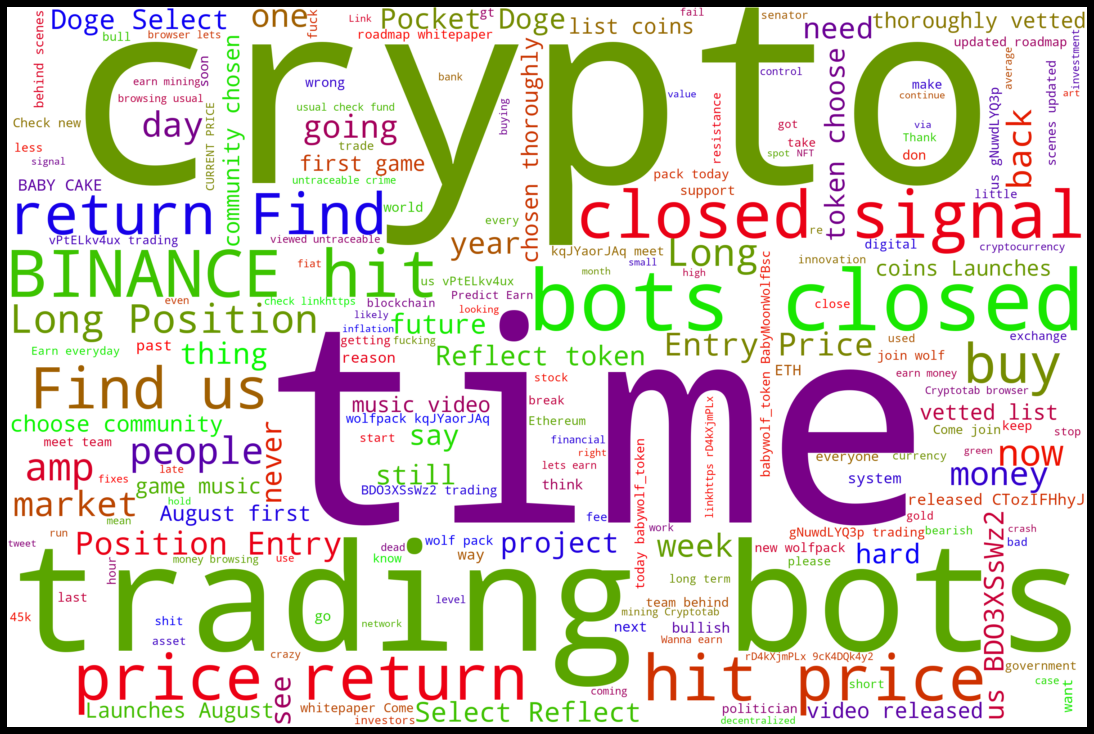

In [ ]:
#Wordcloud for Negative Tweets
stopwords = set(STOPWORDS)
stop_words = ["https","Bitcoin","CO","will","BTC","v1"] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords=stop_words, colormap='brg', background_color='white', width=3000, height=2000).generate(allWords_Negative)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

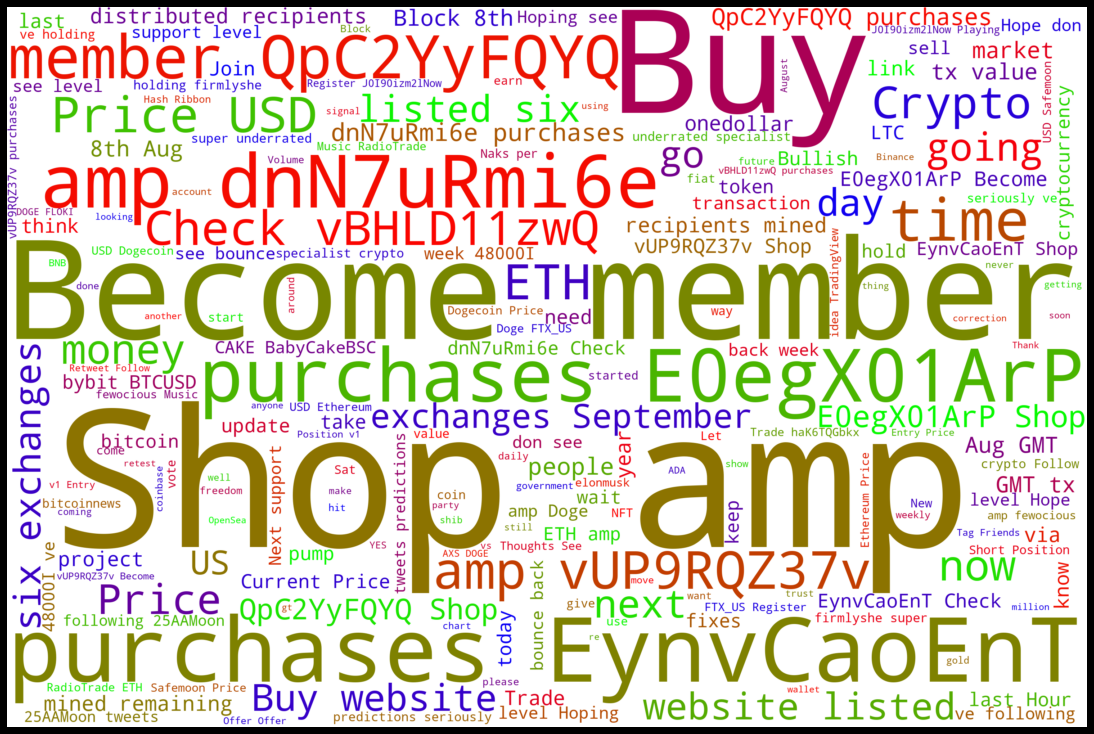

In [ ]:
#Wordcloud for Neutral Tweets
stopwords = set(STOPWORDS)
stop_words = ["https","Bitcoin","CO","will","BTC"] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords=stop_words, colormap='brg', background_color='white', width=3000, height=2000).generate(allWords_Neutral)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()